In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1
Finish the function below, which takes a set of Fourier series coefficients, a fundamental frequency, and a vector of output times, and computes the truncated Fourier series evaluated at these times.

Recall the definition of the Fourier series: $$f_N(t) = \Sigma_{n=-N}^N D_ne^{j\omega_0nt}$$
N is based on the length of the coefficients, the equation should be $$D_n = 2N+1$$

In [7]:
def my_fourier_series(coeffs, freq, times):
    """
    This function should return an output signal, when given the following:
    coeffs - Fourier series coefficients for a given signal (D_n)
    freq - The fundamental frequency of the signal (omega_0)
    times - the time steps for which the output signal should be calculated
    """
    N = (len(coeffs) - 1) // 2
    output_fn = np.zeros_like(times, dtype=np.cdouble)
    for n in range(-N, N+1):
        output_fn += coeffs[n + N] * np.exp(1j * freq * n * times)
    return output_fn

# Task 2
We will now verify the output of the the routine by checking the Fourier series coefficients for Problem 1-a-ii. We will do this for N=10, N=50, and N=100.

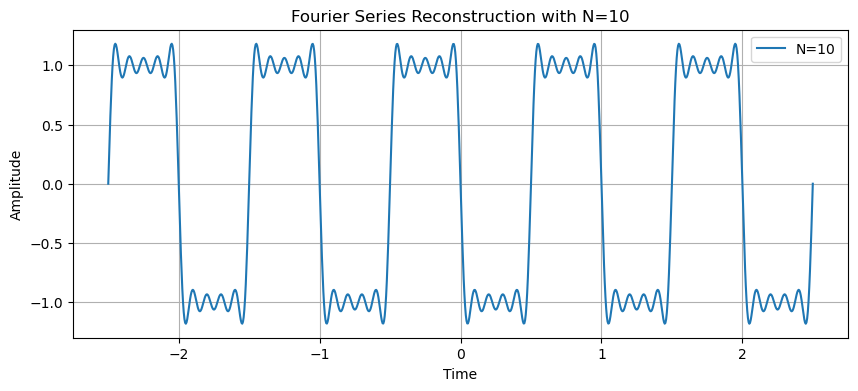

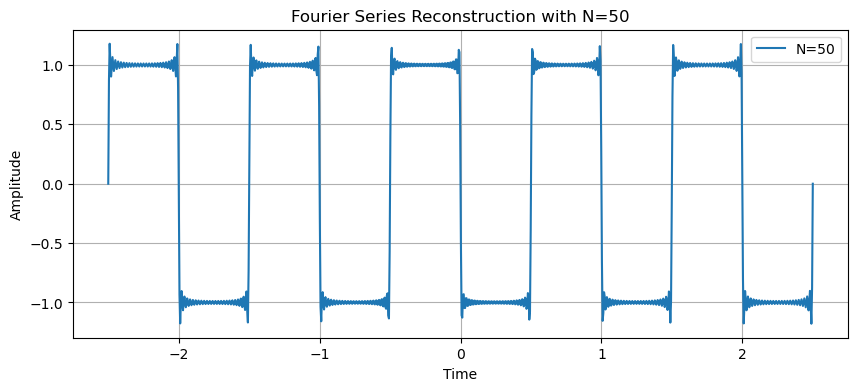

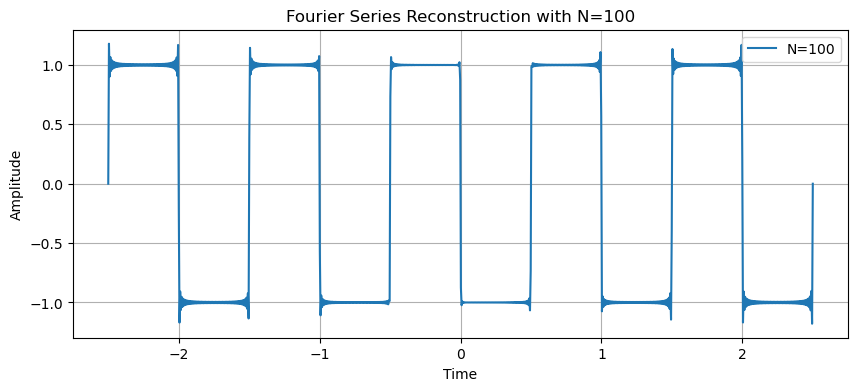

In [3]:
for N in [10, 50, 100]:
    freq = 2 * np.pi  # fundamental frequency
    n = np.linspace(-N, N, 2*N+1)
    # Square wave coefficients (odd harmonics only)
    coeffs = np.zeros(2*N+1, dtype=complex)
    for k in range(-N, N+1):
        if k != 0 and k % 2 != 0:  # odd harmonics
            coeffs[k + N] = 2j / (np.pi * k)
        elif k == 0:  # DC component
            coeffs[k + N] = 0
    
    times = np.linspace(-2.5, 2.5, 1000)
    output_fn = my_fourier_series(coeffs, freq, times)
    plt.figure(figsize=(10, 4))
    plt.plot(times, np.real(output_fn), label=f'N={N}')
    plt.title(f'Fourier Series Reconstruction with N={N}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()